# Bike Sharing Assignment

### **Understanding Problem Statement**

**BoomBikes**, a US bike-sharing provider, aims to boost its revenue post-pandemic. To achieve this, they want to understand the factors influencing the demand for shared bikes in the American market. Specifically, they seek answers to the following questions:

* `Which variables significantly predict bike demand?`
* `How well do these variables describe the demand for shared bikes?`

This analysis will help BoomBikes tailor their services effectively and stand out in the market.

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [4]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 2. Reading and Understanding the Data

### 2.1 Dataset Loading

In [5]:
bikerent=pd.read_csv(r"D:\Upgrad Docs\Bike Sharing Case\day.csv")
bikerent.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2.2 Data Observation and Understanding

In [6]:
bikerent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bikerent.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bikerent.shape

(730, 16)

**Observations:**

1. The dataset contains `730 rows and 16 columns`.
2. All columns except one (“dteday”) are either of `float` or `integer` type.
3. The “dteday” column represents `dates`.
4. Some fields appear to be `categorical` in nature, even though they are stored as integers or floats.

These observations provide a useful overview of the dataset’s characteristics.

## 3. Data Quality Check

### 3.1 Check for null values

In [9]:
bikerent.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
bikerent.isnull().sum(axis=1).sort_values(ascending=False)

0      0
479    0
481    0
482    0
483    0
      ..
245    0
246    0
247    0
248    0
729    0
Length: 730, dtype: int64

**Conclusion:** The dataset contains `no missing` or `null values` in either columns or rows.

### 3.2 Duplicate Check

In [11]:
len(bikerent[bikerent.duplicated()])

0

**Conclusion:** There are `no duplicate values` in the dataset.

## 4. Data Preparation

### 4.1 Investigating feature characteristics

Following information about various columns has been referred from data dictionary.
1. **instant**: This column serves as a record index and is redundant. It will be dropped in the next step.
2. **dteday**: Since our assignment focuses on linear regression, and we already have separate columns for day of the week, month, and year, we will drop this date column in the next step.
3. **season**: The season column contains numeric codes (1:spring, 2:summer, 3:fall, 4:winter). We’ll convert these codes to season names to create appropriate dummy variables.
4. **yr**: This binary column represents the year (0:2018, 1:2019).
5. **mnth**: We’ll convert the month column (ranging from 1 to 12) to month names for creating suitable dummies.
6. **holiday**: A binary variable indicating whether the day is a holiday or not.
7. **weekday**: We’ll convert the numeric day of the week to day names for creating dummies.
8. **workingday**: This variable takes the value 1 if the day is neither a weekend nor a holiday; otherwise, it is 0. We may further transform this column based on visualization during the assignment.
9. **weathersit**: Numeric values in this variable will be mapped to descriptive text entries. After conversion, we’ll visualize patterns and create dummy variables for model development:
    * Clear, Few clouds, Partly cloudy → “Clear to Partly Cloudy”
    * Mist + Cloudy, Mist + Broken Clouds, Mist + Few Clouds, Mist → “Misty and Cloudy”
    * Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered Clouds → “Light Rain and Light Snow”
    * Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog → “Heavy Rain and Heavy Snow”
10. **temp**: Temperature in Celsius.
11. **atemp**: Feeling temperature in Celsius.
12. **hum**: Humidity.
13. **windspeed**: Wind speed.
14. **casual**: Count of casual users (unregistered users).
15. **registered**: Count of registered users.
16. **cnt**: Count of total rental bikes, including both casual and registered users. This column serves as the target variable. While ideally, we should drop both the causal and registered variables, we will decide on their removal after visualization.

### 4.2 Removal of Unecessary Columns

In [12]:
# Let's remove the columns which are identified for removal.

# Creating variable to store list of feature names to be dropped
drop_Col=['instant', 'dteday']

# Drop the above columns
bikerent = bikerent.drop(columns=drop_Col)

# Explore the dataframe
bikerent.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# Initial Data Exploration
bikerent.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Observations**

1. `season:`
    * The season column has 4 values corresponding to the 4 seasons. 
2. `yr:`
    * The data spans exactly 2 years.
3. `mnth:`
    * The number of months is exactly 12, indicating no abnormalities.
4. `holiday:`
    * The maximum value is 1 (holiday) and the minimum is 0 (non-holiday).
5. `weekday:`
    * Weekdays are represented as exactly 7 (0 to 6), corresponding to each day name. Numeric values start from 0 on Sunday.
6. `weathersit:`
    * As per the data dictionary, we should have 4 weather situations.
    * However, the data only contains values corresponding to weather situations 1, 2, or 3.
7. `temp:`
    * Temperature variance ranges from 2.4 to 35.3, with a median value of 20.5°C.
8. `hum:`
    * Humidity levels at Q1 and Q3 are 50% or higher, indicating relatively humid weather.
9. `windspeed:`
    * Windspeed doesn’t exhibit significant variance; relatively calm winds.
10. `casual:`
    * Relatively high variance compared to ‘registered’.
11. `registered:`
    * The given numbers align more closely with the trend in the target variable (cnt).

### 4.3 Data Transformation

In [14]:
# Transforming season, weathersit, mnth and weekday columns

bikerent['weathersit'] = bikerent['weathersit'].map({1: 'Clear to Partly Cloudy', 2:'Misty and Cloudy', 3:'Light Rain and Light Snow', 4:'Heavy Rain and Heavy Snow'})

bikerent['season'] = bikerent['season'].map({1: 'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

bikerent['mnth'] = bikerent['mnth'].map({1: 'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

bikerent['weekday'] = bikerent['weekday'].map({0:'Sun', 1: 'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

bikerent.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,Jan,0,Sat,0,Misty and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,Jan,0,Sun,0,Misty and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,Jan,0,Mon,1,Clear to Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,Jan,0,Tue,1,Clear to Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,Jan,0,Wed,1,Clear to Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
bikerent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


## 5. Exploratory Data Analysis

### 5.1 Univariate Analysis

#### 5.1.1 Target variable

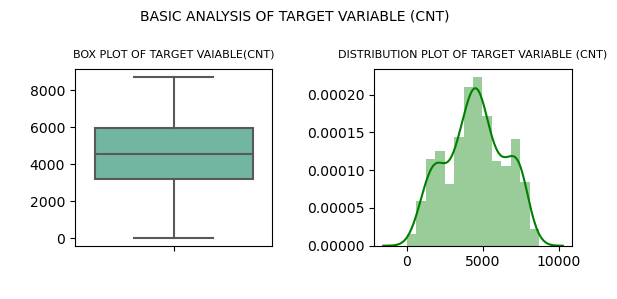

In [16]:
#Creating subplot grid:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(6,3))

#Creating main title
fig.suptitle('basic analysis of target variable (cnt)'.upper(),fontsize=10)

#populating plot1:
sns.boxplot(y=bikerent['cnt'],ax=ax[0], palette='Set2')
ax[0].set_title('box plot of target vaiable(cnt)'.upper(), fontsize=8, fontweight=20, y=1.02)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')

#populating plot2:
sns.distplot(bikerent['cnt'], ax=ax[1], color='green')
ax[1].set_title('distribution plot of target variable (cnt)'.upper(), fontsize=8, fontweight=20, y=1.02)
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')

#Setting aesthetics
plt.tight_layout()
plt.show()

**Observations:**

1. The target variable exhibits an `almost normal distribution` of values, with two distinct plateaus on either side.
2. The first quartile (Q1) of the target variable is approximately 3000, while the third quartile (Q3) is around 6000.
3. The interquartile range (IQR) is approximately 3000, and the median value lies around 4500.

These insights provide a snapshot of the distribution and central tendency of the target variable.

#### 5.1.2 Continuous Variable

In [17]:
# Select continuous variables with more than 2 unique value excluding target variable 'cnt'
cont_var = [col for col in bikerent.select_dtypes(exclude='object').columns if bikerent[col].nunique() > 2 and col != 'cnt']

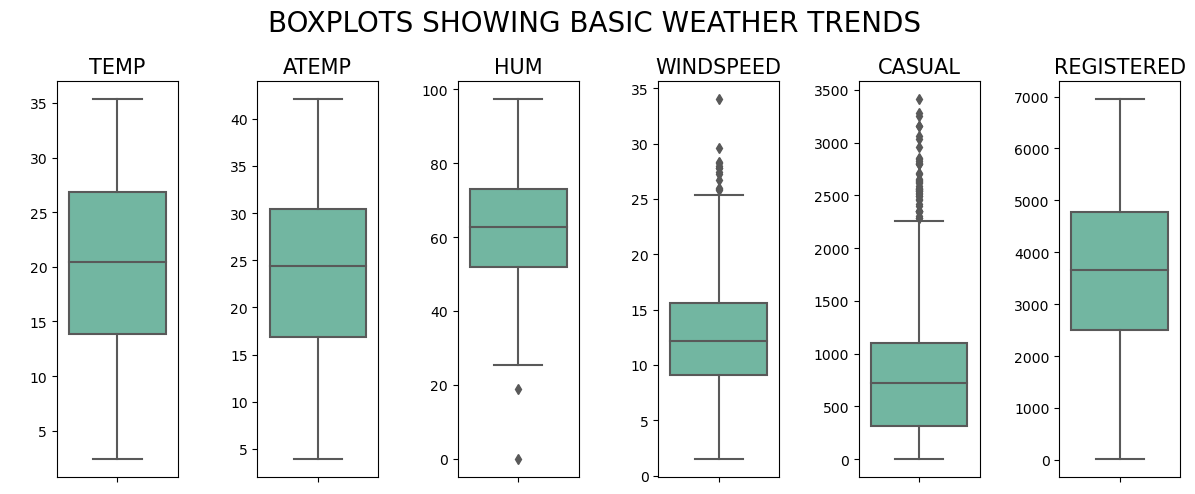

In [18]:
# Create a subplot grid
fig, ax = plt.subplots(nrows=1, ncols=len(cont_var), figsize=(12, 5))

# Set the main title
plt.suptitle('Boxplots Showing Basic Weather Trends'.upper(), fontsize=20)

# Loop to fill the subplot grid with plots
for i, var in enumerate(cont_var):
    sns.boxplot(y=bikerent[var], ax=ax[i], palette='Set2')

    # Set aesthetics and readability
    ax[i].set_title(f'{var.upper()}', fontsize=15)
    ax[i].set_ylabel(' ')

# Adjust final aesthetics
plt.tight_layout()
plt.show()

**Observations:**

1. `Temperature (temp):`
    * The first quartile (Q1) and third quartile (Q3) of temperature are distributed between 14°C and 27°C.
    * The median temperature is around 21°C.
2. `Feeling Temperature (atemp):`
    * The Q1 and Q3 of feeling temperature are distributed between 17°C and 31°C.
    * The median feeling temperature is approximately 24°C.
3. `Humidity, Windspeed, and Casual:`
    * These variables exhibit the presence of outliers.
4. `Temperature and Feeling Temperature:`
    * Both temperature and feeling temperature appear to follow an almost normal distribution.

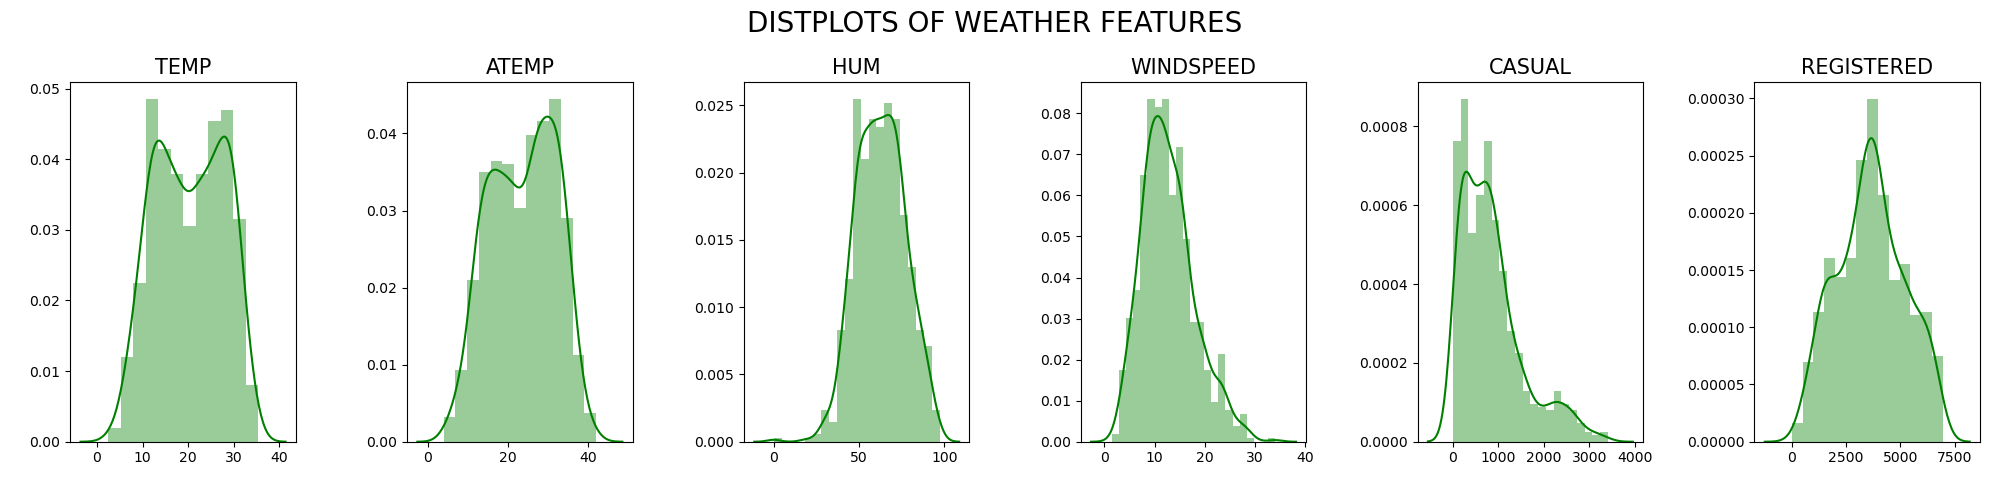

In [19]:
# Create a subplot grid
fig, ax=plt.subplots(nrows=1, ncols=len(cont_var), figsize=(20,5))

# Set the main title
plt.suptitle('distplots of weather features'.upper(), fontsize=20)

# Loop to fill the subplot grid with plots
for i in range(len(cont_var)):
    sns.distplot(bikerent[cont_var[i]], ax=ax[i], color = 'green')

    # Set aesthetics and readability
    ax[i].set_title(f'{cont_var[i].upper()}', fontsize=15)
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')

# Adjust final aesthetics
plt.tight_layout()
plt.show()

**Observation:**

1. `Temperature (temp) and Feeling Temperature (atemp):`
    * Contrary to our initial intuition, both temperature and feeling temperature exhibit double peaks in their distribution.
    * This finding challenges our assumption of a single peak for these weather variables.
2. `Humidity and Windspeed:`
    * The humidity distribution is left-skewed, indicating higher values are more common.
    * Windspeed, on the other hand, is right-skewed, suggesting lower wind speeds are more prevalent.
3. `Casual:`
    * The distribution of casual users shows a strong right skew, indicating a higher concentration of low values.
4. `Registered:`
    * The registered users’ distribution follows a similar trend as the target variable (cnt).
    * However, the plateaus on either side are relatively smoother compared to casual users.

#### 5.1.3 Cateorical Variable

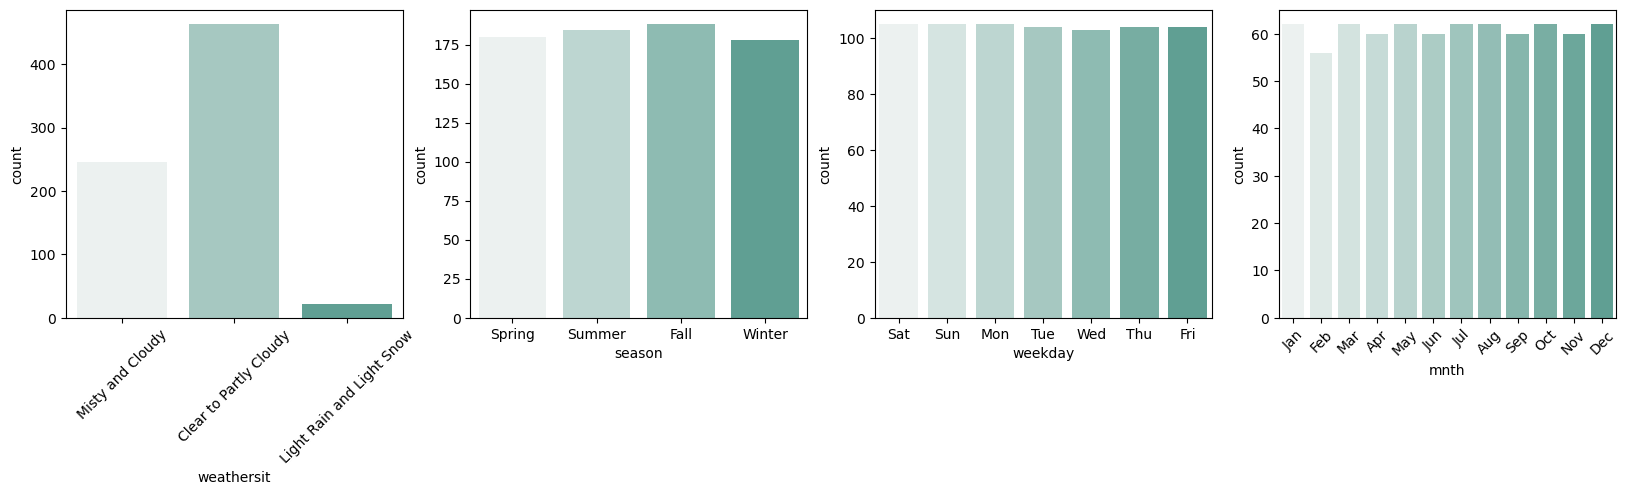

In [20]:
# Visualize Categorical columns for Univariate analysis

plt.figure(figsize = [20,4])
plt.subplot(141)
sns.countplot(data = bikerent, x = 'weathersit', palette='light:#5A9')
plt.xticks(rotation = 45)
plt.subplot(142)
sns.countplot(data = bikerent, x = 'season', palette='light:#5A9')
plt.subplot(143)
sns.countplot(data = bikerent, x = 'weekday', palette='light:#5A9')
plt.subplot(144)
plt.xticks(rotation = 45)
sns.countplot(data = bikerent, x = 'mnth', palette='light:#5A9')
plt.show()

**Observations:**

1. `Bike Usage and Weather:`
    * When the weather situation is “Clear to Partly Cloudy,” bike usage is higher.
    * Other weather situations show similar and relatively close values.
2. `Seasons:`
    * Fall is the longest season, followed by summer, and then spring.
    * Winter is the shortest season.
3. `Weather Situation (weathersit):`
    * The data contains only three types of weather situations.
    * Interestingly, there hasn’t been a single day with heavy rain or snow.
    * Most days have been either clear or partly cloudy throughout both years.

### 5.2 Bivariate Analysis

#### 5.2.1 Continuous Variable

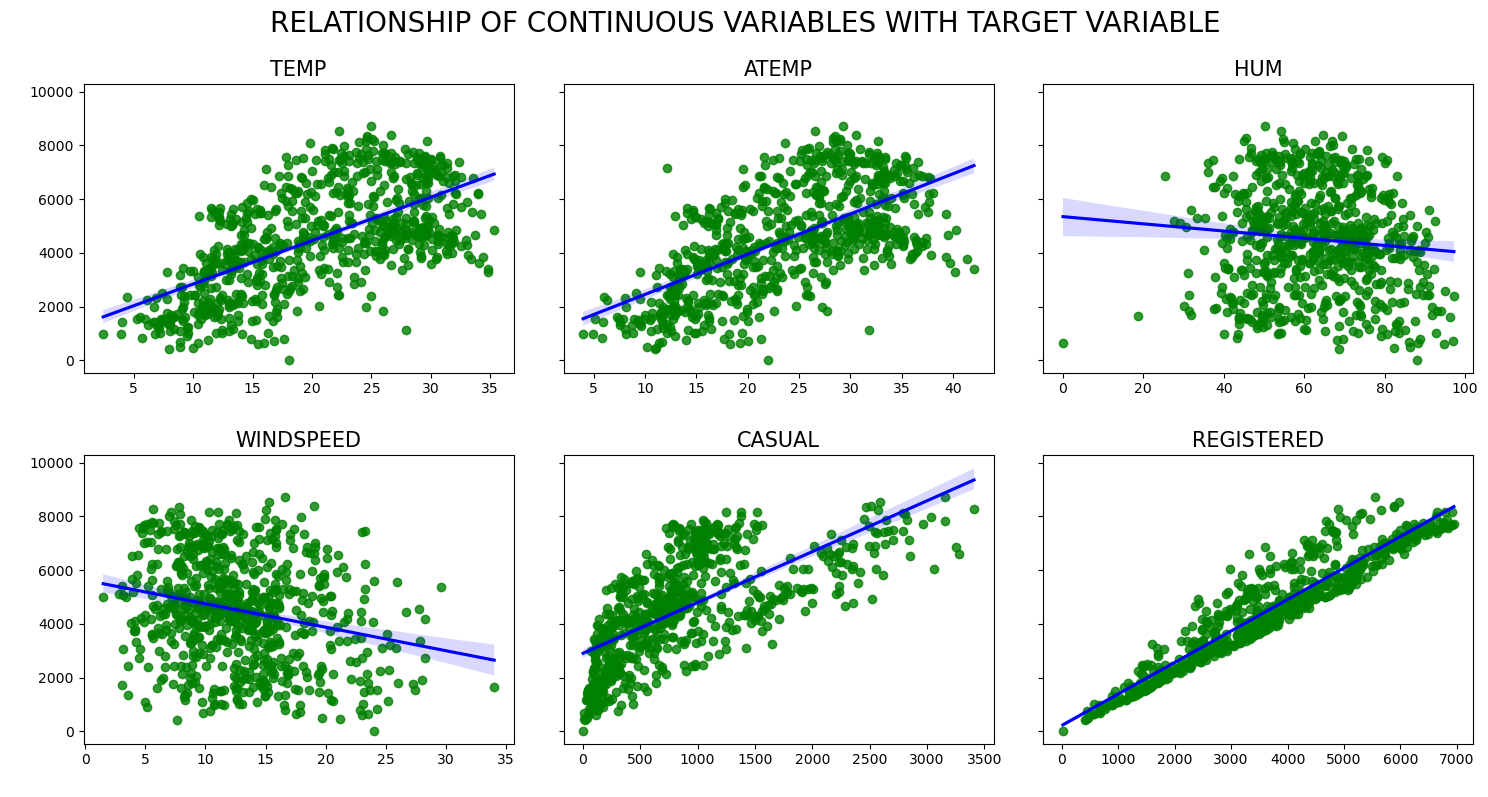

In [21]:
# Create a subplot grid
fig, ax = plt.subplots(nrows=2, ncols=int(len(cont_var)/2), figsize=(15,8), sharey=True)

# Set the main title
plt.suptitle('relationship of continuous variables with target variable'.upper(), fontsize=20, fontweight = 15, y=0.99)

# Loop to fill the subplot grid with plots
k=0
for i in range(2):
    for j in range(int(len(cont_var)/2)):
        sns.regplot(x=bikerent[cont_var[k]], y=bikerent['cnt'], ax=ax[i,j], scatter_kws={'color':'green'}, line_kws={'color':'blue'})

        # Set aesthetics and readability
        ax[i,j].set_title(f'{cont_var[k].upper()}', fontsize=15)
        ax[i,j].set_xlabel(' ')
        ax[i,j].set_ylabel(' ')

        k+=1

# Adjust final aesthetics
plt.tight_layout()
plt.show()

**Observations:**

1. `Temperature and Feeling Temperature:`
    * Bike demand exhibits a similar and directly proportional relationship with both temperature (temp) and feeling temperature (atemp).
2. `Humidity and Windspeed:`
    * Bike demand is inversely proportional to humidity.
    * Similarly, it shows an inverse relationship with windspeed.
3. `User Types:`
    * Bike demand is directly proportional to both casual and registered user counts.

#### 5.2.2 Categorical Variable

##### 5.2.2.1 Comparison of all Categorical Variable in the data with Target Variable

In [22]:
# Select columns with object data type (categorical variables)
cat_var = list(bikerent.select_dtypes(include='object').columns)

# Add binary variables (with 2 unique values) to the list
cat_var.extend([col for col in bikerent.columns if bikerent[col].nunique() == 2])

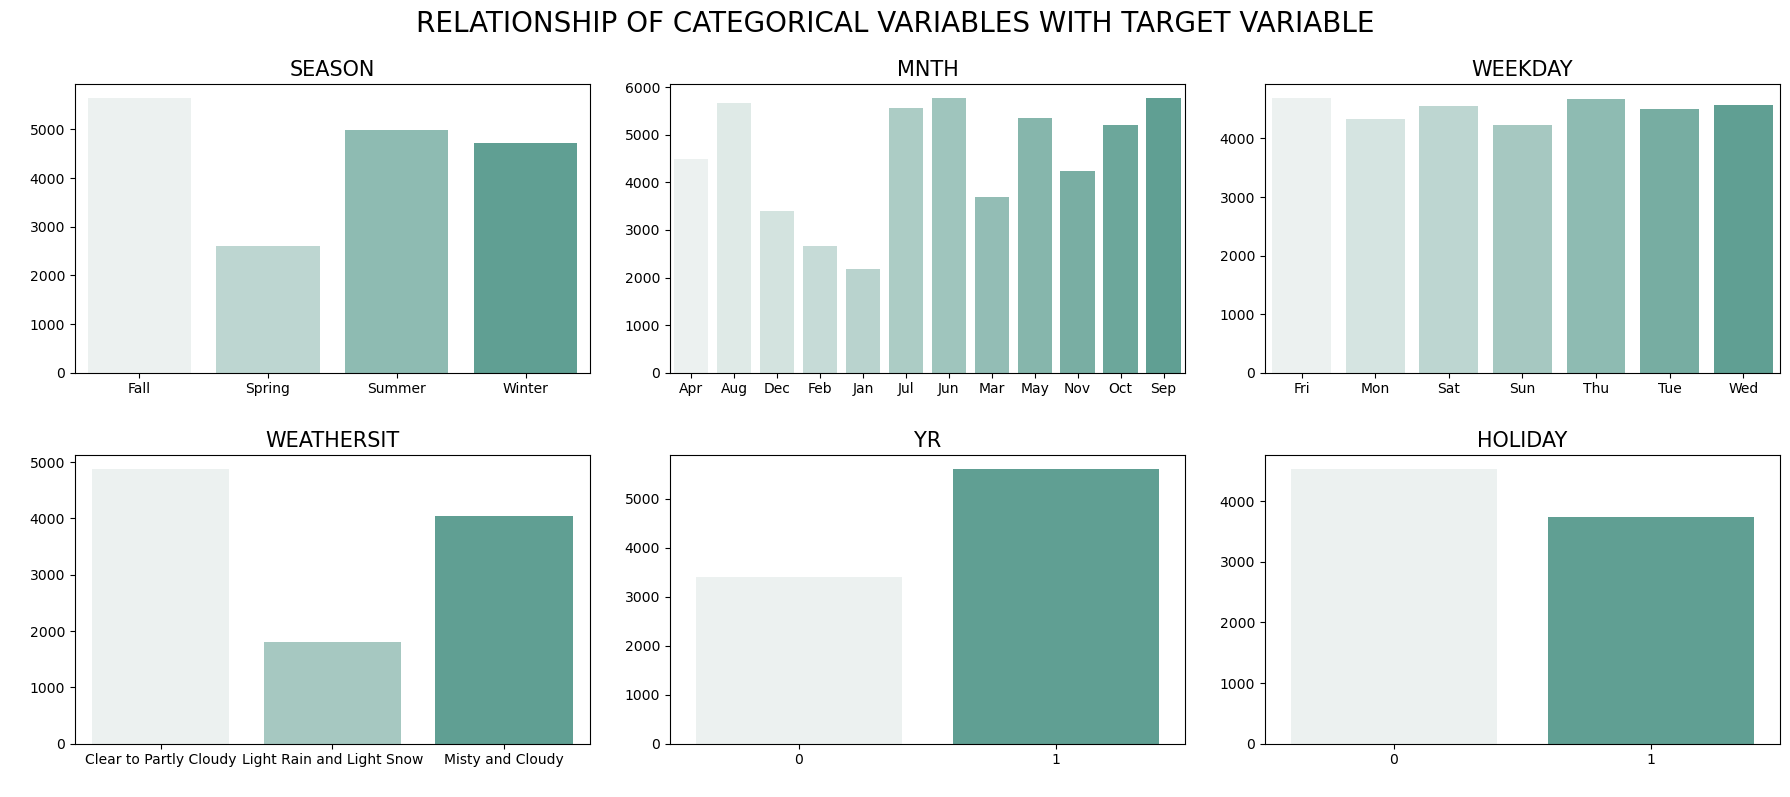

In [23]:
# Create a subplot grid
fig, ax = plt.subplots(nrows=2, ncols=int(len(cat_var)/2), figsize=(18,8))

# Set the main title
plt.suptitle('relationship of categorical variables with target variable'.upper(), fontsize=20, fontweight = 15, y=0.99)

# Loop to fill the subplot grid with plots
k=0
for i in range(2):
    for j in range(int(len(cat_var)/2)):
        sns.barplot(x=bikerent.groupby(by=cat_var[k]).mean().index, y=bikerent.groupby(by = cat_var[k]).mean()['cnt'], ax=ax[i,j], palette='light:#5A9')

        # Set aesthetics and readability
        ax[i,j].set_title(f'{cat_var[k].upper()}', fontsize=15)
        ax[i,j].set_xlabel(' ')
        ax[i,j].set_ylabel(' ')

        k+=1

# Adjust final aesthetics
plt.tight_layout()
plt.show()

**Observations:**

1. `Day of the Week and Bike Demand:`
    * The highest bike demand is observed on Friday, Saturday, Sunday, and Thursday.
    * This pattern suggests that bikes are used for a mix of purposes—both office commutes and leisure travel.
2. `Weather and Demand:`
    * Bike demand is exceptionally high on clear days.
    * Weather conditions play a significant role in influencing bike usage.
3. `Business Growth:`
    * The company has experienced significant business growth from 2018 to 2019.
    * This positive trend indicates the company’s success.
4. `Holiday vs. Weekdays:`
    * Bike usage on holidays is slightly lower than on weekdays.
    * People seem to prefer bikes for daily commuting during weekdays.
5. `Working Days vs. Non-Working Days:`
    * Bike usage is similar regardless of whether it’s a working day or not.
    * This suggests consistent demand throughout the week.

##### 5.2.2.2 Comparing Bike Demand on Working Days vs. Non-Working Days

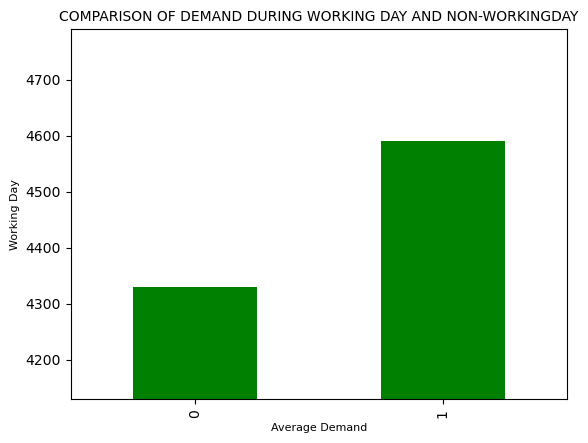

In [24]:
plt.title('comparison of demand during working day and non-workingday'.upper(),fontsize=10)
bikerent.groupby(by='workingday').mean()['cnt'].plot.bar(color='green')
plt.xlabel('average demand'.title(), fontsize=8)
plt.ylabel('working day'.title(), fontsize=8)
plt.ylim(min(bikerent.groupby(by='workingday').mean()['cnt'])-200, max(bikerent.groupby(by='workingday').mean()['cnt'])+200,)
plt.show()

**Observation:**

* Bike usage is `higher on working days`.
* Although demand decreases slightly on weekends (by approximately 3%), the overall difference in demand between weekdays and weekends is minimal.

##### 5.2.2.3 Patterns of Weather-Related Continuous Variables Across Seasons

In [25]:
# Initializing a list of weather-related continuous variables:
weather_var=['temp', 'atemp', 'hum', 'windspeed']

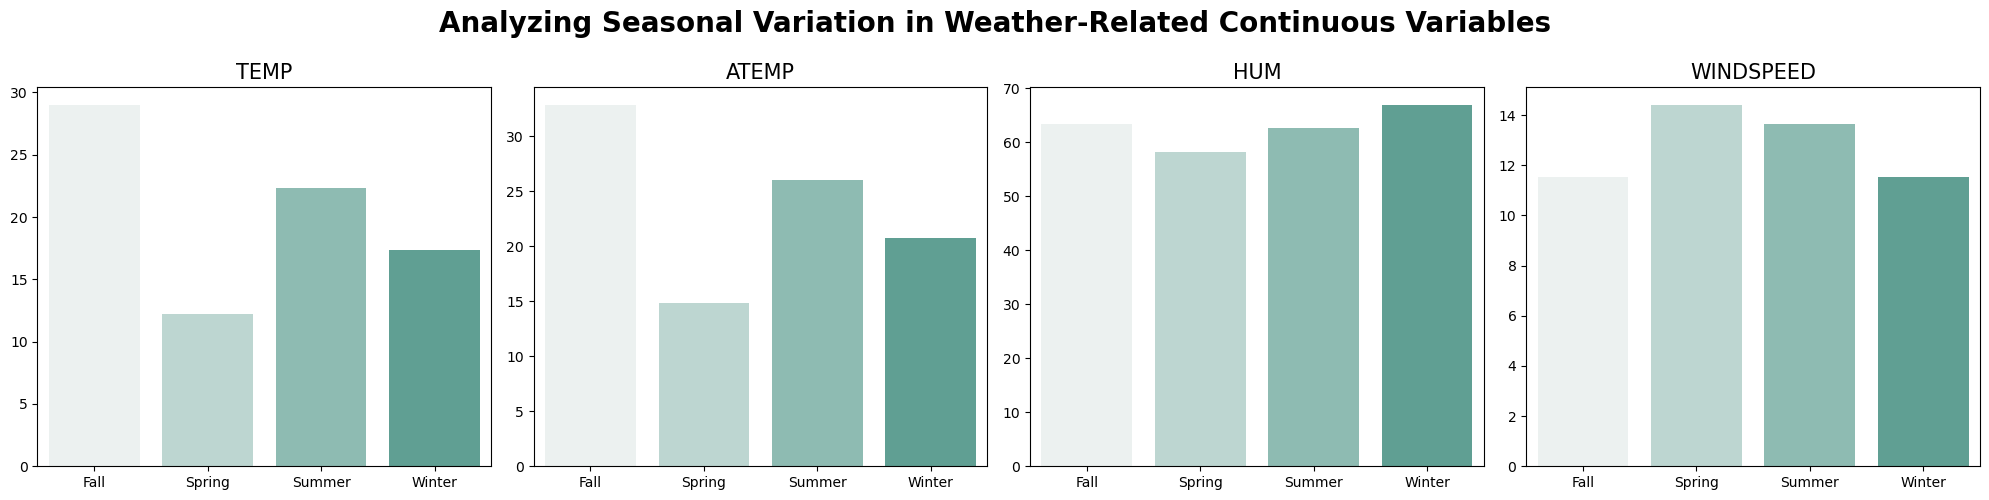

In [26]:
# Create a subplot grid
fig, ax = plt.subplots(nrows=1, ncols=len(weather_var), figsize=(20, 5))

# Set the main title
plt.suptitle('Analyzing Seasonal Variation in Weather-Related Continuous Variables', fontsize=20, fontweight='bold', y=0.99)

# Loop to fill the subplot grid with plots
for i, var in enumerate(weather_var):
    sns.barplot(y=bikerent.groupby(by='season').mean()[var], x=bikerent.groupby(by='season').mean().index, ax=ax[i], palette='light:#5A9')

    # Set aesthetics and readability
    ax[i].set_title(f'{var.upper()}', fontsize=15)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')

# Adjust final aesthetics
plt.tight_layout()
plt.show()

**Observations:**

1. `Temperature and Temperature Feeling`:
    * The average temperature and perceived temperature exhibit an intriguing pattern. They are highest during the fall season, followed closely by summer.
    * Surprisingly, spring shows relatively lower average temperatures compared to winter.
2. `Humidity`:
    * Winter experiences the highest humidity levels, followed by fall and summer. Spring, however, has lower humidity levels.
3. `Windspeed`:
    * Spring stands out with the highest windspeed, followed by summer.

The following reference table illustrates the seasonal and monthwise variations of continuous weather features.

In [27]:
bikerent.groupby(by = ['season','mnth']).mean()[['holiday','workingday','temp','atemp','hum','windspeed','casual','registered','cnt']]

holiday  workingday       temp      atemp        hum  windspeed  \
season mnth                                                                     
Fall   Aug   0.000000    0.741935  29.051844  32.573740  63.773010  11.585516   
       Jul   0.032258    0.661290  30.974287  35.204693  59.787632  11.125941   
       Jun   0.000000    0.750000  29.815540  33.567428  54.406250  12.904325   
       Sep   0.045455    0.659091  25.597755  29.359852  71.831316  11.398001   
Spring Dec   0.090909    0.590909  12.215995  14.729875  63.842477  14.304489   
       Feb   0.035714    0.678571  12.235249  14.943046  56.322686  14.494573   
       Jan   0.048387    0.645161   9.694201  11.989795  58.582827  13.822285   
       Mar   0.000000    0.700000  16.012501  19.135314  56.983105  15.157842   
Summer Apr   0.033333    0.666667  19.269952  22.854045  58.806312  15.710310   
       Jun   0.000000    0.700000  27.164208  31.084715  59.167702  12.182538   
       Mar   0.000000    0.772727  16.011340  19.029268  62.237318  14.489990   
       May   0.032258    0.693548  24.386735  28.283100  68.895831  12.260258   
Winter Dec   0.000000    0.700000  13.873371  17.175946  68.122917  10.473367   
       Nov   0.066667    0.666667  15.138010  18.367938  62.487648  12.314695   
       Oct   0.032258    0.677419  19.885500  23.598660  69.376087  11.738767   
       Sep   0.000000    0.687500  24.390739  27.878984  70.481769  10.349210   

                  casual   registered          cnt  
season mnth                                         
Fall   Aug   1161.919355  4502.500000  5664.419355  
       Jul   1260.596774  4303.080645  5563.677419  
       Jun   1188.050000  4581.350000  5769.400000  
       Sep   1184.863636  4487.840909  5672.704545  
Spring Dec    293.772727  1660.681818  1954.454545  
       Feb    266.035714  2403.928571  2669.964286  
       Jan    194.225806  1982.112903  2176.338710  
       Mar    678.850000  2872.775000  3551.625000  
Summer Apr   1013.366667  3471.533333  4484.900000  
       Jun   1253.625000  4520.225000  5773.850000  
       Mar    785.909091  3162.045455  3947.954545  
       May   1214.274194  4135.500000  5349.774194  
Winter Dec    380.750000  3820.200000  4200.950000  
       Nov    610.050000  3637.133333  4247.183333  
       Oct    963.870968  4235.354839  5199.225806  
       Sep   1136.812500  4887.687500  6024.500000

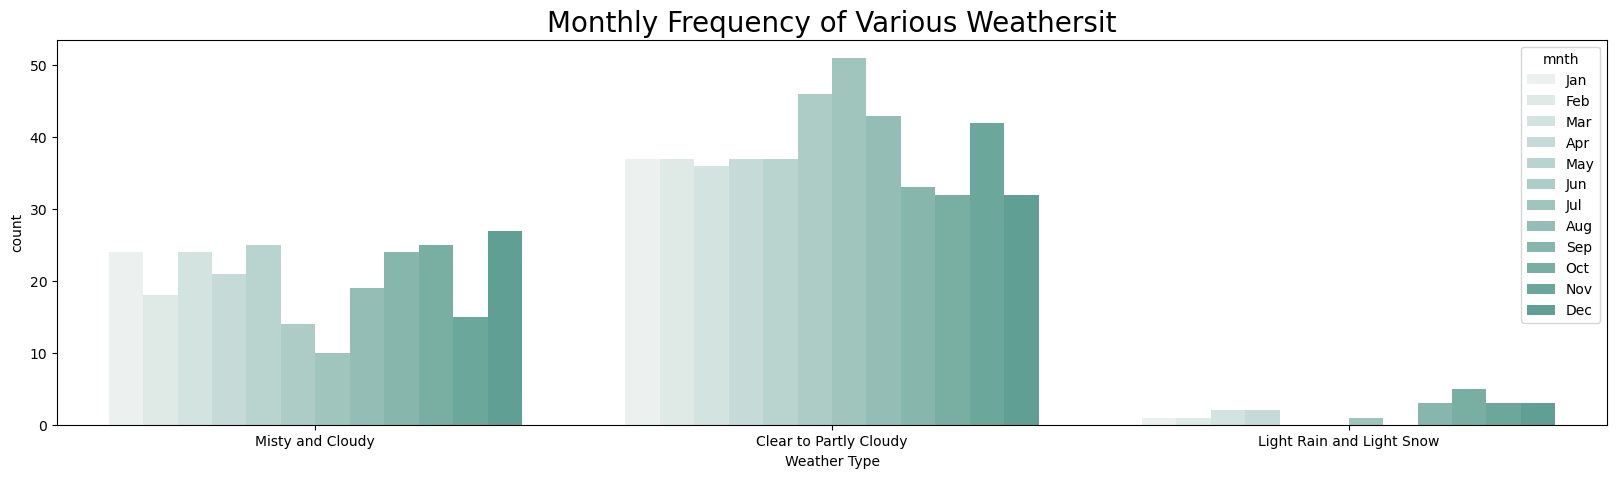

In [28]:
#Monthwise variation in weathersit

# Define figure size
plt.figure(figsize=(20, 5))

# Create a countplot for monthwise variation in weathersit
sns.countplot(x='weathersit', data=bikerent, hue='mnth', palette='light:#5A9')

# Set title and axis labels
plt.title('Monthly Frequency of Various Weathersit', fontsize=20)
plt.xlabel('Weather Type')

plt.show()

**Observations:**

1. `Overall Weather Trends`:
    * The most frequent weather condition observed across all days is **“Clear to Partly Cloudy”**.
    * Following closely, we have the weather type **“Misty and Cloudy”**.
2. `Monthly Occurrences`:
    * **July** experiences the highest occurrence of **“Clear to Partly Cloudy”** days.
    * In descending order, the next most common months for this weather type are **June** and **August**.
3. `Misty Days`:
    * **December** stands out with the highest number of **“Misty”** occurrences.
    * **January**, **March**, **May**, and **October** also witness significant misty weather.

#### 5.2.3 Correlation

##### 5.2.3.1 Correlation using pairplot

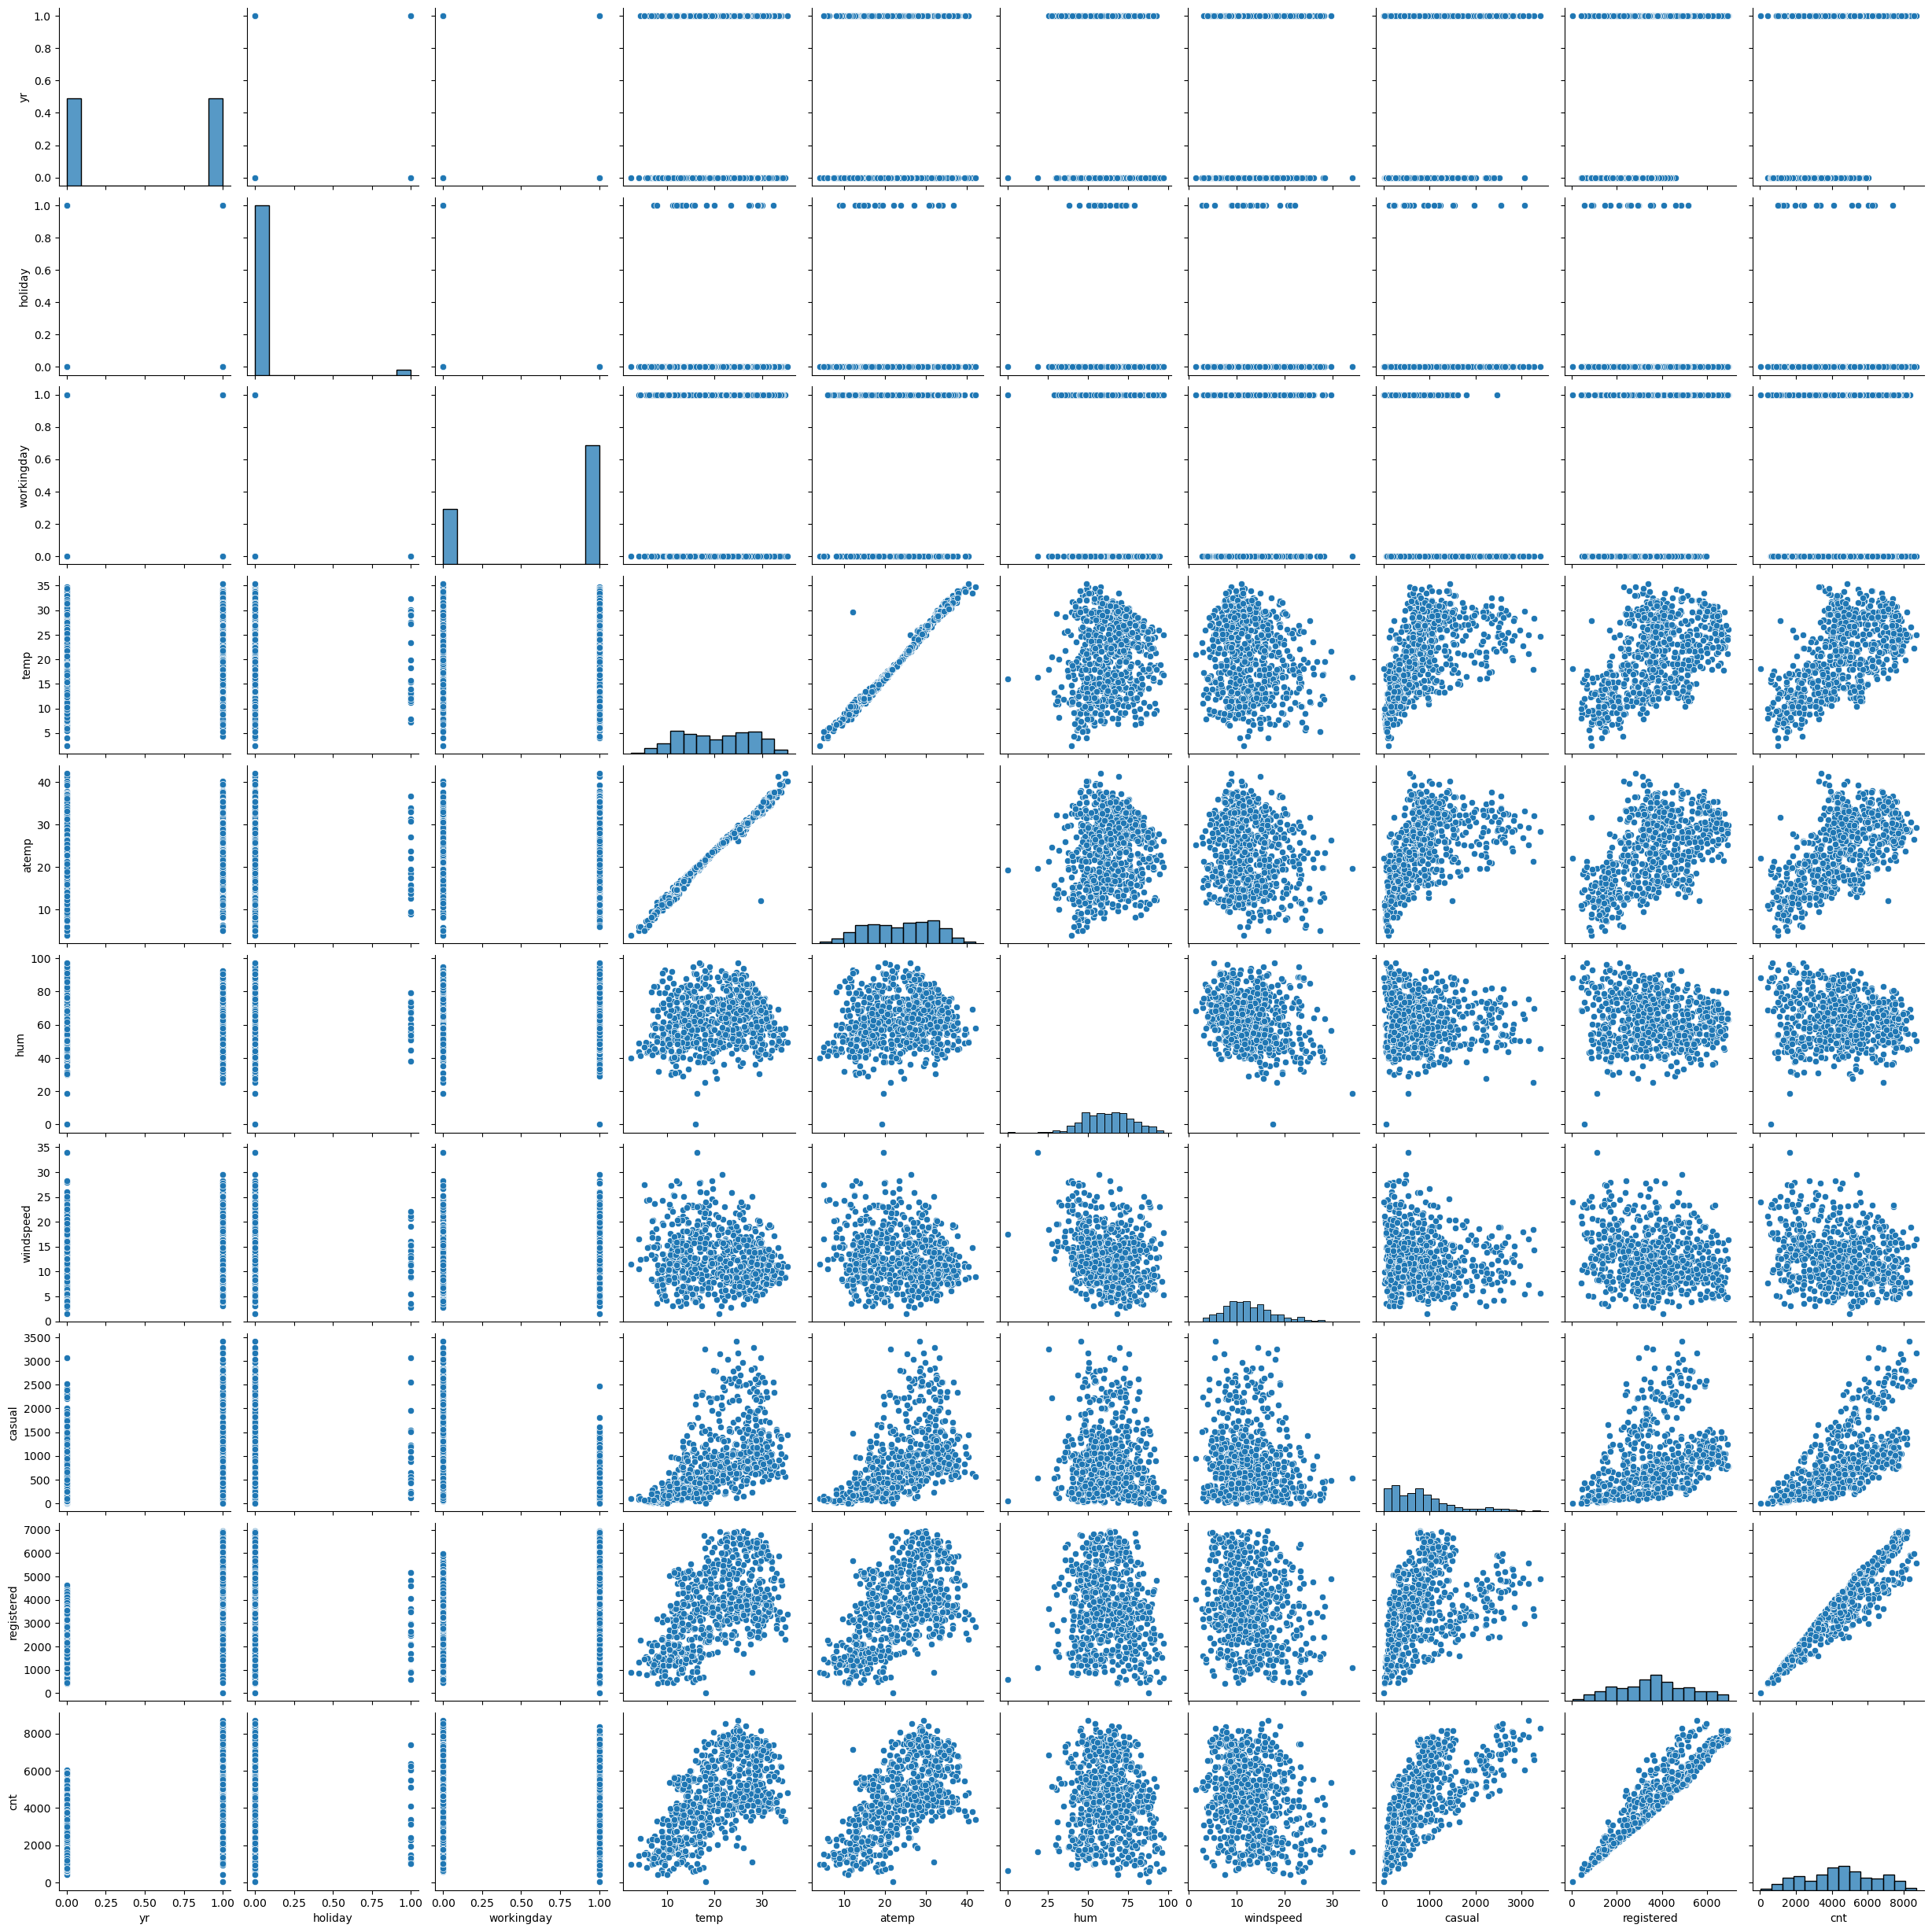

In [29]:
sns.pairplot(bikerent, palette='light:#5A9')
plt.show()

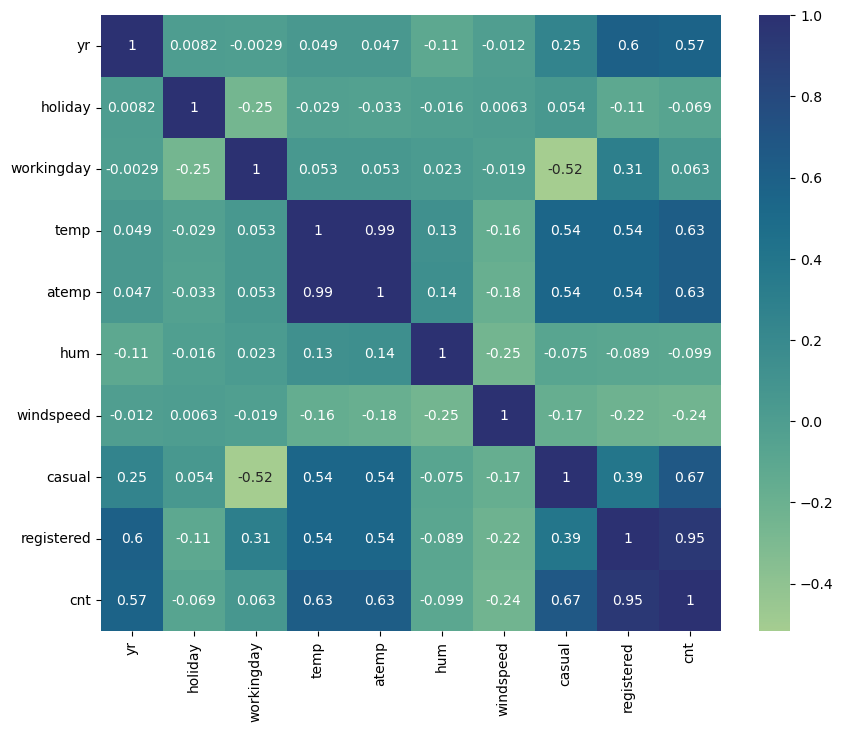

In [30]:
plt.figure(figsize = (10,8))
sns.heatmap(bikerent.corr(), annot = True, cmap="crest")
plt.show()

**Observations:**

* The heatmap reveals multicollinearity among certain variables, highlighting their interdependence.
* Additionally, it identifies variables with strong collinearity relative to the target variable.
* Target Variable (Dependent):
    * The target variable exhibits a **direct proportionality** with both **temperature (temp)** and **apparent temperature (atemp)**.
    * Conversely, it shows an **inverse proportionality** with **humidity** and **windspeed**.
* Independent Variables:
    * **Windspeed** demonstrates an **inverse relationship** with **temperature**, **apparent temperature**, and **humidity**.
    * On the other hand, **humidity** is **directly proportional** to **temperature** and **apparent temperature**, while being **inversely proportional** to **windspeed**.
* During the linear model construction, we’ll use this heatmap iteratively. It will guide us in assessing correlated values, considering VIF (Variance Inflation Factor), and evaluating p-values. Ultimately, this process helps us make informed decisions about variable selection and elimination.

**Note**
* The target variable, denoted as `cnt`, is the sum of both `casual` and `registered` bike rentals.
* Given this relationship, the variables `casual` and `registered` together fully account for the target variable.
* Consequently, we can safely drop the `casual` and `registered` features from further analysis.

In [31]:
bikerent.drop(labels=['casual', 'registered'], axis=1, inplace=True)
bikerent.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear to Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear to Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear to Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


## 6. Identification Model Developement Approach

**How is it qualifying for Modeling and Prediction?**

* The target variable exhibits significant relationships with temperature (temp), apparent temperature (atemp), humidity, and windspeed, as revealed by the heatmap.
* Additionally, the target variable correlates with season and month, as demonstrated in the earlier barplots.
* Given these findings, we can confidently classify this as a `Machine Learning problem`. The outcome depends on independent features and historical data, making it suitable for modeling and prediction.

**Is it Supervised/Unsupervised?**
* Since we have an available target variable, this problem falls under the category of `Supervised Learning`. The outcome depends on historical records and independent features.

**Is it a Regression problem?**
* Since the target variable `cnt` is continuous, this problem falls into the category of `Regression Analysis`. Our goal is to predict a numerical value based on independent features.

**Does it aligns with Multiple Indepndent features?**
* Based on the exploratory data analysis (EDA), we observe that the target variable is influenced by multiple independent features.
Consequently, this problem aligns with the characteristics of a `Multiple Linear Regression` problem, where we aim to model the relationship between the target variable and several predictors.

## 7. Multiple Linear Regression for Model Development

### 7.1 Data Understanding

In [32]:
# Exploring of data
bikerent.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear to Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear to Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear to Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


**Observations:**
* `Year (yr)`, `Holiday`, and `Working Day` are binary variables in our dataset.
    * These variables take on values of either 0 or 1, representing specific conditions (e.g., year type, holiday occurrence, and working/non-working day).

### 7.2 Dummy Variables

In [33]:
# New dataframe for ML algorithm :
bikerent_ml=bikerent.copy()

In [34]:
# Create dummy variables for categorical features
categorical_columns = bikerent_ml.select_dtypes(include='object').columns

#Creating Dummies
for column in categorical_columns:
    dummies = pd.get_dummies(bikerent_ml[column], drop_first=True)
    bikerent_ml = pd.concat([bikerent_ml, dummies], axis=1).drop(labels=column, axis=1)

In [35]:
# Exploring the new Dataframe
bikerent_ml.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain and Light Snow,Misty and Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
bikerent_ml.shape

(730, 30)

### 7.3 Correlation

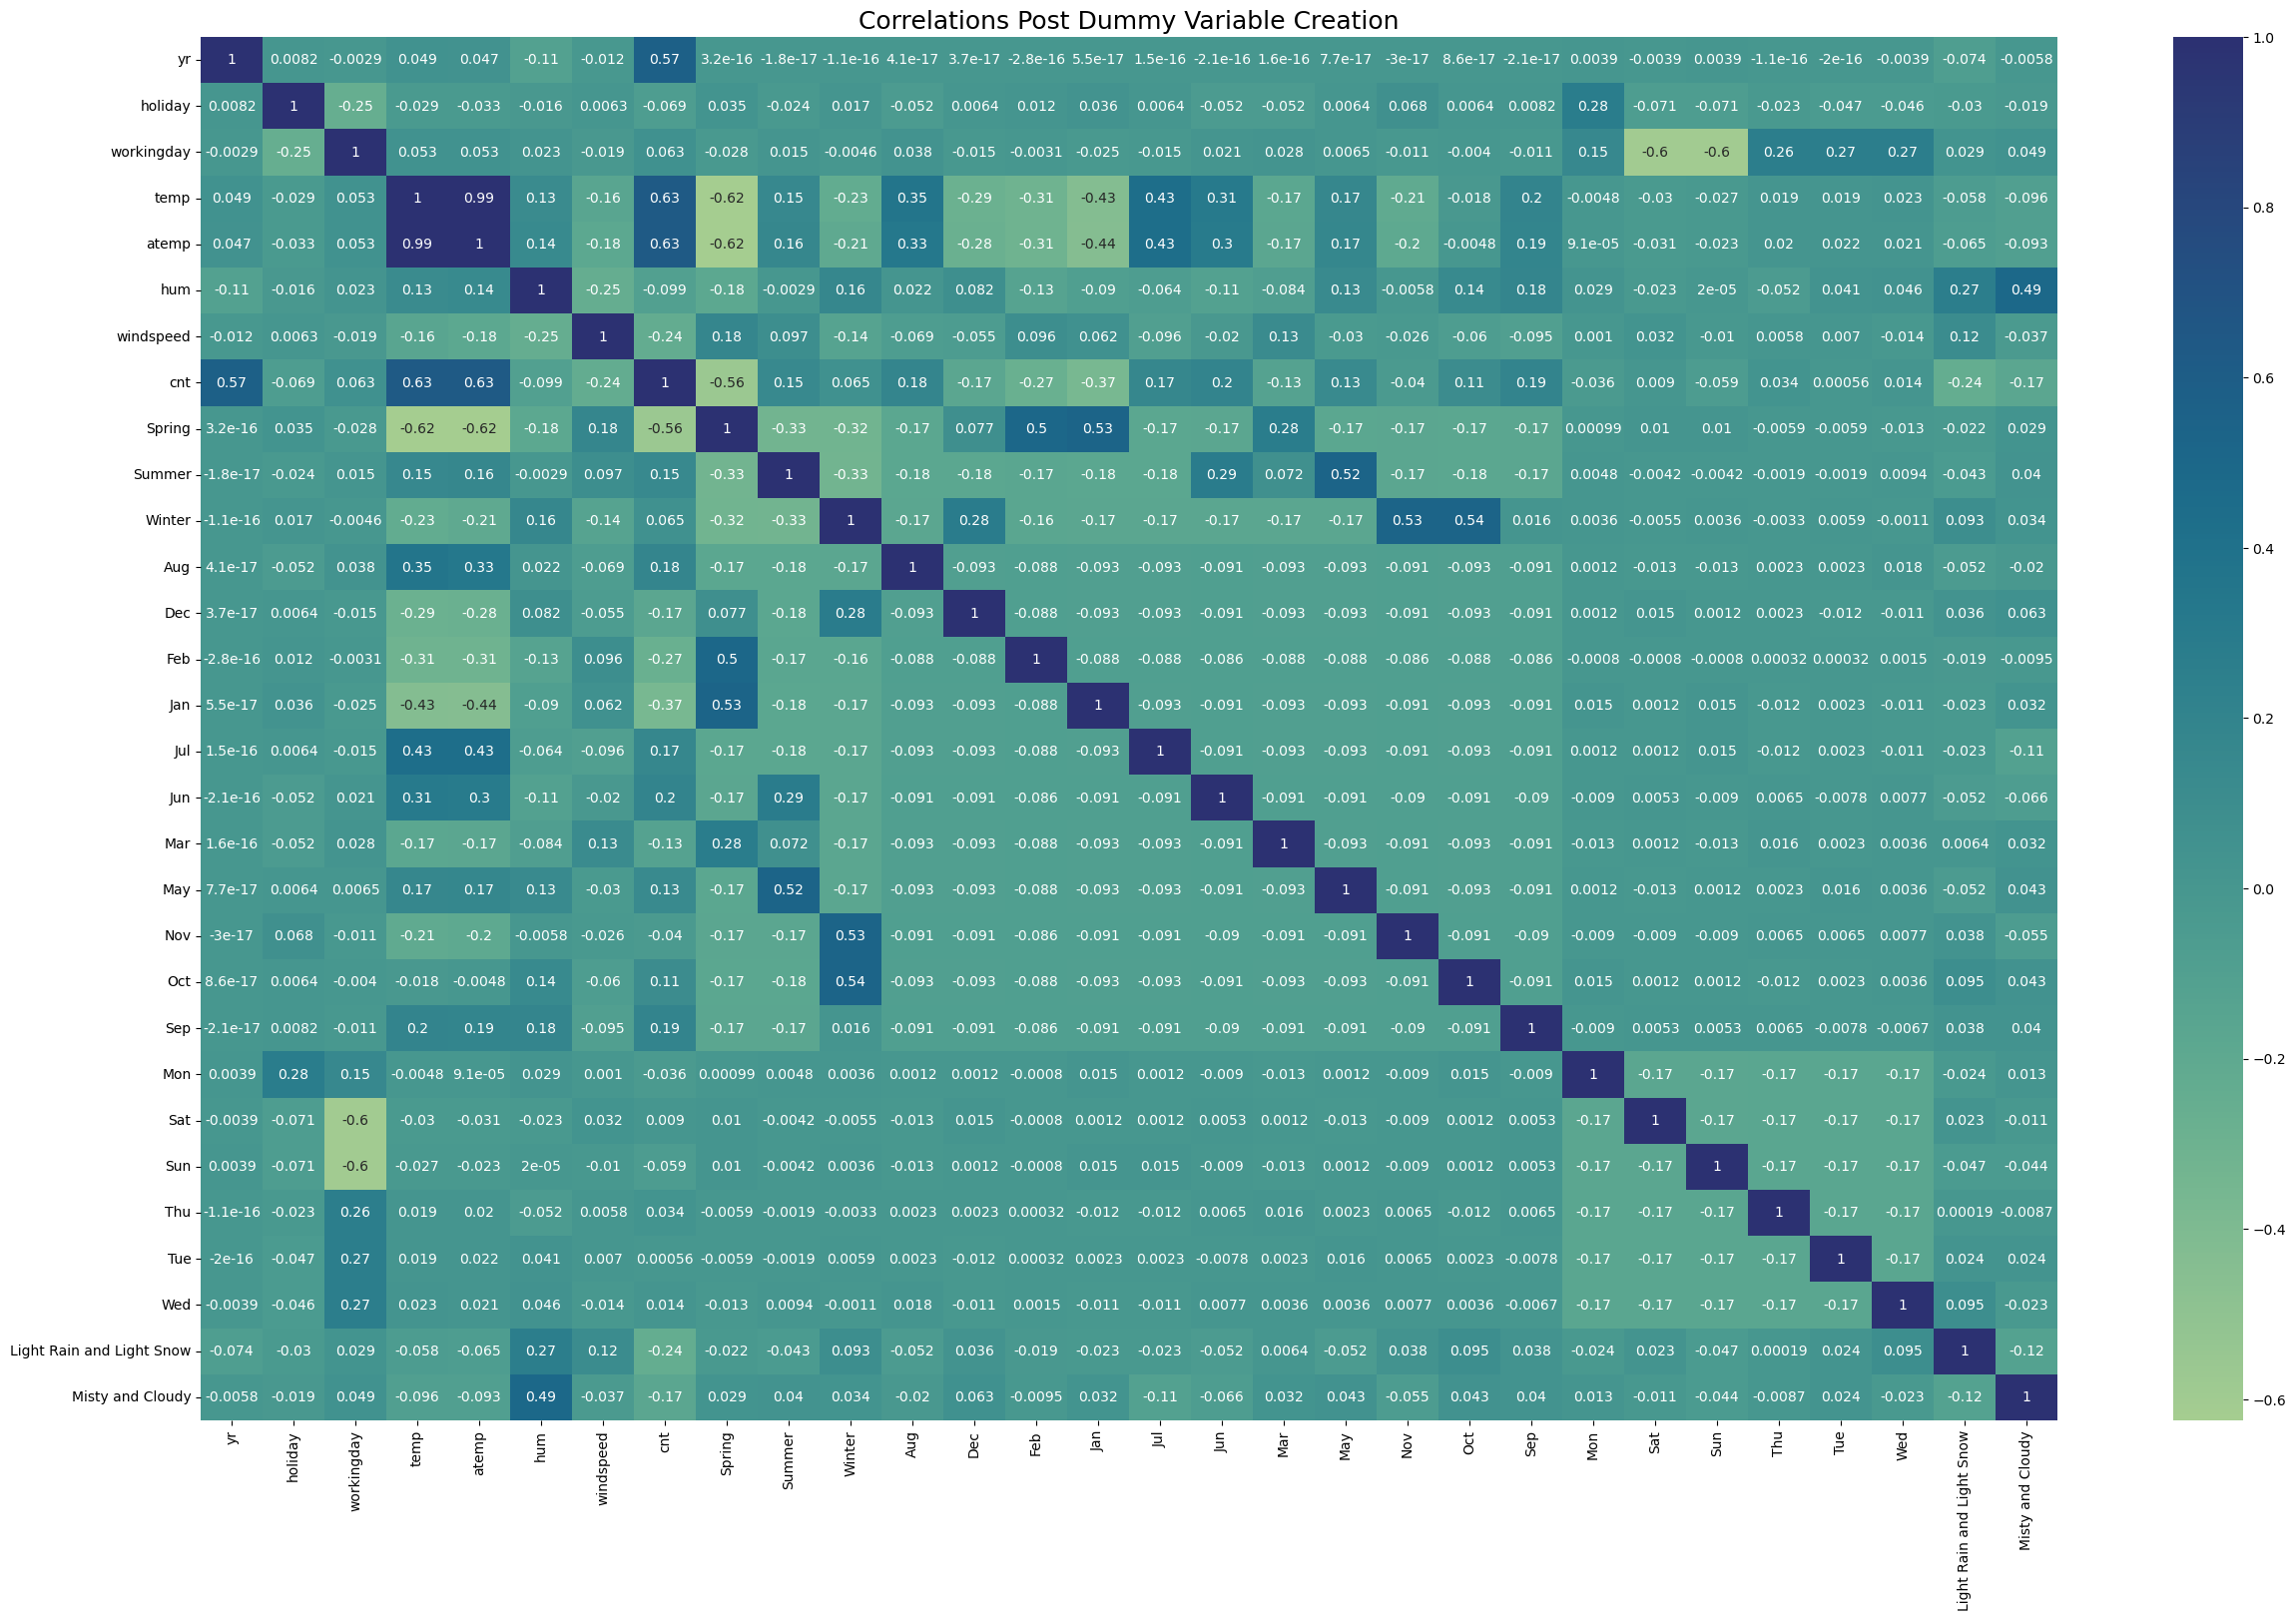

In [37]:
# Create a correlation heatmap after dummy variable creation

plt.figure(figsize=(30, 18))
plt.title('Correlations Post Dummy Variable Creation', fontsize=18, y=1)
sns.heatmap(bikerent_ml.corr(), annot=True, cmap='crest', fmt='.2g')
plt.show()

**Note:**

* By visualizing the color coding, it is observed that most of the correlation lies between -0.2 to 0.4

### 7.4 Train-Test Split

Dividing the data in 2 distinct datasets:
1. `Training Dataset (br_train)`:
    * This dataset will serve as the training data for our model.
    * It allows the model to learn the coefficients and patterns from historical records.
2. `Testing Dataset (br_test)`:
    * The testing dataset will remain largely “unknown” to our model during training.
    * We reserve it for evaluating the model’s performance after training.
    * It helps us assess how well the model generalizes to new, unseen data.

In [38]:
# Exploring the new Dataframe which was created for ML
bikerent_ml.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain and Light Snow,Misty and Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
# Prepare br_train, br_test:
br_train, br_test=train_test_split(bikerent_ml, test_size=0.30, random_state=100)

In [40]:
br_test.shape

(219, 30)

In [41]:
br_train.shape

(511, 30)

**Observations:**
1. The total number of rows in the br_train and br_test sets adds up to exactly 730, which precisely matches the row count of our bikerent_ml dataset. This indicates that the rows have been correctly divided between the training and testing subsets.
2. Similarly, the number of columns in the dataset is 27, which aligns perfectly with the column count of our bikerent_ml dataset.

In [42]:
# Visual inspection
br_train.sample(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain and Light Snow,Misty and Cloudy
131,0,0,1,21.935000,26.16815,74.7500,12.707689,4864,0,1,...,0,0,0,0,0,1,0,0,0,0
597,1,0,1,26.615847,30.05125,67.3750,4.875644,7006,0,0,...,0,0,0,0,0,0,1,0,0,0
137,0,0,1,22.550000,26.35790,87.0000,13.499964,3855,0,1,...,0,0,0,0,0,0,0,1,0,1
251,0,0,1,26.650000,28.94730,89.7917,8.333393,3544,0,0,...,0,1,0,0,0,0,0,0,0,1
281,0,0,0,22.174153,26.19915,72.7500,4.251150,5511,0,0,...,1,0,0,0,1,0,0,0,0,0


### 7.5 Rescaling the data

We need to choose between two rescaling techniques:

1. `Normalization (Min-Max Scaling)`: This technique compresses features into the range between 0 and 1.
2. `Standardization`: It transforms data such that the mean becomes 0 and the standard deviation becomes 1.

In this specific case, the we opted for the MinMax scaler due to the following reasons:

* **Handling Outliers**: The exploratory data analysis (EDA) revealed the presence of outliers in some features. Since these outliers have not been addressed yet, the MinMax Scaler will automatically handle them during scaling.
* **Distribution Independence**: The distribution of the dataset does not significantly impact the choice of scaler.
* **Binary Variables**: The dataset contains binary variables already in the 0 and 1 form. Consequently, the remaining data can be scaled accordingly.

The MinMax scaler employs the normalization formula: $X_{sc}=(X−X_{min})/(X_{max}−X_{min})$. This ensures that the maximum data value corresponds to 1, the minimum value corresponds to 0, and the other data points lie between these bounds based on their relative context.

Data rescaling occurs after the **train-test split** to prevent the scaler or the final model from having knowledge of the test dataset.

The MinMaxScaler will now be applied to the training data based on the aforementioned logic.

In [43]:
#Creating a scaler instance
scaler=MinMaxScaler()

In [44]:
# Extracting the list of feature names for scaling
scaler_list = [col for col in br_train.columns if br_train[col].nunique() > 2]

# Scaling the variables and updating our dataframe:
br_train[scaler_list] = scaler.fit_transform(br_train[scaler_list])

In [45]:
#Inspecting br_train:
br_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain and Light Snow,Misty and Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


## 7.6 Splitting Training Dataset in X & Y

In [46]:
# Splitting in X and Y

y_train=br_train.pop('cnt')
X_train=br_train

In [47]:
# Checking the shapes of X_train and Y_train
X_train.shape

(511, 29)

In [48]:
y_train.shape

(511,)

**Observations:**

The dataset has been correctly divided into X_train and y_train subsets. Both subsets contain 511 rows. Specifically:

* X_train consists of 26 columns.
* y_train consists of 1 column.

This ensures that the data has been appropriately prepared for training purposes.

In [49]:
# Exploring X_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain and Light Snow,Misty and Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [50]:
# Exploring y_train
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## 7.7 Feature Selection

We have to opt for a combination of automated and manual feature selection:

1. `Automated Selection`:
    * Initially, we will employ Recursive Feature Selection (RFE) for automated model selection.
    * Following industry best practices, the RFE function will be explicitly instructed to select the optimal number of features based on their importance ranking.
2. `Manual Selection`:
    * After the automated approach, we will fine-tune feature selection manually.
    * This manual approach will leverage external desk research and intuition to make informed decisions regarding feature inclusion or exclusion.

### 7.7.1 Recursive Feature Elimination (RFE)

In [51]:
# Create an instance of LinearRegression
lm = LinearRegression()

# Fit the model with X_train and y_train
lm.fit(X_train, y_train)

# Create an RFE instance based on the fitted lm
rfe = RFE(estimator=lm, n_features_to_select=15)

# Convert rfe to the fitted RFE
rfe = rfe.fit(X_train, y_train)

In [52]:
#Brief visual observation of results:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 15),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light Rain and Light Snow', True, 1),
 ('Misty and Cloudy', True, 1)]

**Observations:**

The key observations regarding the Recursive Feature Selection (RFE) process:

* The results display the suggestions provided by the RFE function to retain the top 15 features.
* We arrived at this specific number of retained features based on an industry-preferred practice. Typically, it involves considering half of the variables during the RFE operation.
* Any feature for which the boolean value returned by rfesupport_ is True represents a feature that RFE recommends including in the model.

Based on the previous results, extract the **top 15 index columns** from the train dataset.

In [53]:
# Initialize another dataframe
temp_rfe_df = pd.DataFrame()

# Add feature names to the dataframe
temp_rfe_df['Col'] = X_train.columns

# Include rfe.support_ values in the dataframe (True if feature is recommended to be kept, False otherwise)
temp_rfe_df['RFE Support'] = rfe.support_

# Retain only the features recommended for the initial model
temp_rfe_df = temp_rfe_df[temp_rfe_df['RFE Support']]

# Inspect the resulting dataframe
temp_rfe_df

,Col,RFE Support
0,yr,True
1,holiday,True
2,workingday,True
3,temp,True
5,hum,True
6,windspeed,True
7,Spring,True
8,Summer,True
9,Winter,True
13,Jan,True


In [54]:
# Initialize a list of features recommended for the initial model
X_Train_cols = temp_rfe_df['Col'].tolist()

# Retain the recommended features in X_train
X_train[X_Train_cols].head()

,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Jan,Jul,Sep,Sat,Light Rain and Light Snow,Misty and Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1


## 7.8 Model Development

During the model development stage, we will follow these steps:

1. `Variance Inflation Factor (VIF)`:
    * VIF, available in the statsmodels library, will help us identify variables that need to be dropped to handle multicollinearity.
    * We will set a threshold of **5**. If the VIF value exceeds this threshold for any variable, we will consider dropping it (unless specific logic compels us to retain certain variables in the dataset).
2. `Ordinary Least Squares (OLS)`:
    * We will use the OLS method from the statsmodels library to develop the linear regression model.
    * OLS aims to minimize the sum of residual squares, determining the most ideal regression line.
    * Our threshold for p-values will be **0.05**. If the p-value exceeds this threshold for any variable, we will drop it one by one (unless specific logic justifies retaining certain variables in the dataset).
3. `Model Development Process`:
    * Initially, we will start with all variables.
    * Calculate the VIF for each variable.
    * Build the regression model using OLS.
    * Observe a combination of VIF values and p-values generated by the OLS model.
    * Gradually drop insignificant variables one by one.
    * With each variable removal, we expect an increase in the R-squared value.
    * The p-values of the remaining variables should reduce.
    * Eventually, we will arrive at a model with all significant variables, ready for further analysis.

### 7.8.1 Define New Functions

In [55]:
# Defining functions for VIF table
def vif_table(dataframe):
    
    #Calculates and returns a dataframe with feature names and their corresponding VIF values.
    vif = pd.DataFrame({'Features': dataframe.columns,'VIF values': [round(variance_inflation_factor(dataframe.values, i), 2) for i in range(len(dataframe.columns))]}).sort_values(by='VIF values', ascending=False)

    return vif

In [56]:
# Defining function for Regression Statistics
def regmodel_ols(y_dataframe, X_dataframe):
    #Fits an OLS linear regression model and prints the statistical summary.
    X_dataframe = sm.add_constant(X_dataframe)
    lm = sm.OLS(y_dataframe, X_dataframe).fit()
    print(lm.summary())

In [57]:
# Create a new dataframe for building models:
X_train_1=X_train[my_cols]

### 7.8.2 Building Model

In [58]:
# Building Regression Model
regmodel_ols(y_train, X_train_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.50e-191
Time:                        18:34:19   Log-Likelihood:                 520.05
No. Observations:                 511   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -940.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observaions:**

Here are the key observations from the regression model:

* The **R-squared value** of **0.848** indicates that **84.8%** of the variance in the target variable is explained by the **15 selected features**.
* The **Adjusted R-squared** value is **0.844**.
* All the **p-values** for the variables are within the acceptable threshold of **0.05**. Therefore, dropping any variable would not be logically justified.
* While maintaining efficacy, it is advisable to **simplify the model** by reducing the number of features. Currently, we have **15 features** in the model.

In [59]:
#Inspecting VIF values:
vif_table(X_train_1)

,Features,VIF values
4,hum,29.39
3,temp,17.80
2,workingday,5.32
5,windspeed,4.73
6,Spring,4.53
8,Winter,3.48
7,Summer,2.85
14,Misty and Cloudy,2.29
0,yr,2.09
12,Sat,1.98


**Observations:**

Here are the key observations regarding the model:

1. `VIF (Variance Inflation Factor)`:
    * The VIF values for **humidity (hum)** and **temperature (temp)** are very high and exceed acceptable limits.
    * High VIF indicates strong multicollinearity among these variables.
2. `P-values`:
    * All the p-values are within acceptable limits.
    * However, relying solely on p-values to decide which feature to drop next is not feasible.
3. `Feature Removal Decision`:
    * Both **hum** and **temp** are significant variables.
    * Removing either of them will negatively impact the **R-squared** and **adjusted R-squared** values.
    * After experimentation, we found that dropping **hum** has a relatively smaller impact on the R-squared values compared to dropping **temp**.
    * Therefore, the decision is to drop **hum** before redeveloping the model.

In [60]:
# Dropping 'hum' column:
X_train_2=X_train_1.drop(labels='hum', axis=1)

# Rebuilding model:
regmodel_ols(y_train,X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     190.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          6.18e-189
Time:                        18:34:19   Log-Likelihood:                 511.07
No. Observations:                 511   AIC:                            -992.1
Df Residuals:                     496   BIC:                            -928.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations:**

* **R-squared and adjusted R-squared** values have declined significantly.
* However, our **VIF (Variance Inflation Factor)** values appear to be within acceptable limits, which validates the model.
* We will proceed by **rechecking the VIF values** to ensure model stability.

In [61]:
vif_table(X_train_2)

,Features,VIF values
3,temp,7.08
2,workingday,5.26
4,windspeed,4.68
5,Spring,3.07
6,Summer,2.34
0,yr,2.08
7,Winter,1.99
11,Sat,1.97
8,Jan,1.62
9,Jul,1.59


**Observations:**

1. `High Collinearity`:
    * The VIF values for **temperature (temp)** and **working day** still exceed acceptable limits, rendering the model invalid.
    * These high VIF values indicate strong multicollinearity among these variables.
2. `Feature Removal Decision`:
    * Upon closer inspection, the researcher discovered that dropping the **holiday** feature does not significantly impact the **R-squared value**.
    * In contrast, dropping either **temp** or **working** day would substantially affect the **R-squared score**.
    * Therefore, the decision is to drop the **holiday** feature before redeveloping the model.

In [62]:
# Dropping 'holiday' column:
X_train_3=X_train_2.drop(labels='holiday', axis=1)

# Rebuilding model:
regmodel_ols(y_train,X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.37e-189
Time:                        18:34:19   Log-Likelihood:                 508.92
No. Observations:                 511   AIC:                            -989.8
Df Residuals:                     497   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations:**

* The impact on both the **R-squared** and **adjusted R-squared** scores is minimal.

In [63]:
vif_table(X_train_3)

,Features,VIF values
2,temp,6.83
1,workingday,4.69
3,windspeed,4.67
4,Spring,2.99
5,Summer,2.33
0,yr,2.08
6,Winter,1.92
10,Sat,1.84
7,Jan,1.62
8,Jul,1.59


**Observations:**

1. `High Collinearity`:
    * The VIF value for **temperature (temp)** still exceeds acceptable limits, rendering the model invalid.
    * This high VIF indicates strong multicollinearity.
2. `Feature Removal Decision`:
    * Upon closer inspection, the researcher discovered that dropping the **January (Jan)** feature does not significantly impact the **R-squared** value.
    * In contrast, dropping either **temp** or **working day** would substantially affect the **R-squared score**.
    * Therefore, the decision is to **drop the January feature** before redeveloping the model.

In [64]:
# Dropping 'Jan' column:
X_train_4=X_train_3.drop(labels='Jan', axis=1)

# Rebuilding model:
regmodel_ols(y_train,X_train_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.7
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.69e-189
Time:                        18:34:19   Log-Likelihood:                 506.36
No. Observations:                 511   AIC:                            -986.7
Df Residuals:                     498   BIC:                            -931.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations:**

* The impact on both the **R-squared** and **adjusted R-squared** scores is minimal

In [65]:
vif_table(X_train_4)

,Features,VIF values
2,temp,6.74
1,workingday,4.67
3,windspeed,4.65
4,Spring,2.38
5,Summer,2.32
0,yr,2.07
6,Winter,1.92
9,Sat,1.83
7,Jul,1.58
11,Misty and Cloudy,1.57


**Observations:**

1. `High Collinearity`:
    * The VIF value for **temperature (temp)** still exceeds acceptable limits, rendering the model invalid.
    * This high VIF indicates strong multicollinearity.
2. `Feature Removal Decision`:
    * Upon closer inspection, the researcher discovered that dropping the **July (Jul)** feature does not significantly impact the **R-squared value**.
    * In contrast, dropping either **temp** or **working day** would substantially affect the **R-squared score**.
    * Therefore, the decision is to **drop the July feature** before redeveloping the model.

In [66]:
# Dropping 'Jul' column:
X_train_5=X_train_4.drop(labels='Jul', axis=1)

# Rebuilding model:
regmodel_ols(y_train,X_train_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          5.44e-189
Time:                        18:34:19   Log-Likelihood:                 502.80
No. Observations:                 511   AIC:                            -981.6
Df Residuals:                     499   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations:**

* The impact on both the **R-squared** and **adjusted R-squared** scores is minimal

In [67]:
vif_table(X_train_5)

,Features,VIF values
2,temp,5.49
1,workingday,4.67
3,windspeed,4.64
4,Spring,2.30
0,yr,2.07
5,Summer,2.00
8,Sat,1.83
6,Winter,1.77
10,Misty and Cloudy,1.56
7,Sep,1.23


**Observations:**

1. `High Collinearity`:
    * The VIF value for **temperature (temp)** still exceeds acceptable limits, rendering the model invalid.
    * This high VIF indicates strong multicollinearity.
2. `Feature Removal Decision`:
    * Upon closer inspection, the researcher discovered that dropping the **Spring** feature does not significantly impact the **R-squared** value.
    * In contrast, dropping either **temp** or **working day** would substantially affect the **R-squared score**.
    * Therefore, the decision is to **drop the Spring feature** before redeveloping the model.

In [68]:
# Dropping 'Spring' column:
X_train_6=X_train_5.drop(labels='Spring', axis=1)

# Rebuilding model:
regmodel_ols(y_train,X_train_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.7
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.13e-188
Time:                        18:34:19   Log-Likelihood:                 499.17
No. Observations:                 511   AIC:                            -976.3
Df Residuals:                     500   BIC:                            -929.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [69]:
vif_table(X_train_6)

,Features,VIF values
2,temp,4.77
1,workingday,4.05
3,windspeed,3.44
0,yr,2.02
7,Sat,1.69
4,Summer,1.57
9,Misty and Cloudy,1.53
5,Winter,1.40
6,Sep,1.20
8,Light Rain and Light Snow,1.08


**Observations:**

1. `Model Simplicity`:
    * Although there is a slight impact on both the R-squared and adjusted R-squared scores, the model has become simpler by retaining only 10 variables.
    * This trade-off ensures a balance between model efficacy and complexity.
2. `VIF Values`:
    * All the VIF values are within proper limits, satisfying the assumption of multicollinearity.
    * This validates the model’s suitability for further analysis.

From the analysis above, we can conclude that one of the assumptions of linear regression is met:

* **None of the features in our model exhibit strong correlations with each other or combinations of multiple features.**

### 7.8.3 Residual Analysis

#### 7.8.3.1 Normal distribution of Error

In [70]:
# Fit the OLS model
lm = sm.OLS(y_train, X_train_6).fit()

# Predictions on the training data
y_train_pred = lm.predict(X_train_6)

# Calculate residuals
residuals = y_train - y_train_pred

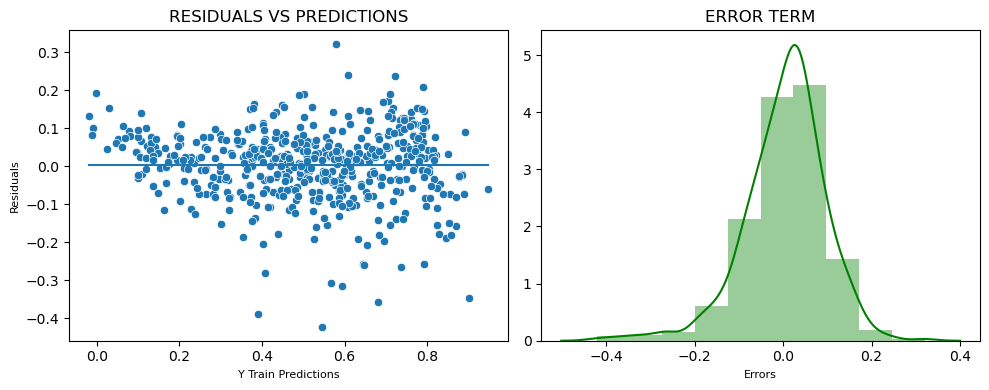

In [71]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Scatter plot of residuals vs. predictions
sns.scatterplot(y=residuals, x=y_train_pred, palette='light:#5A9', ax=ax[0])
sns.lineplot(y=residuals.mean(), x=y_train_pred, palette='light:#5A9', ax=ax[0])
ax[0].set_title('Residuals vs Predictions'.upper(), fontsize=12)
ax[0].set_ylabel('Residuals'.title(), fontsize=8)
ax[0].set_xlabel('Y Train Predictions'.title(), fontsize=8)

# Distribution plot of residuals
sns.distplot(residuals, bins=10, color='green', ax=ax[1])
ax[1].set_title('Error Term'.upper(), fontsize=12)
ax[1].set_ylabel('')
ax[1].set_xlabel('Errors'.title(), fontsize=8)

plt.tight_layout()
plt.show()

**Observations:**

Here are the key observations regarding the residuals:

* The **mean of the residuals** is **extremely close to 0** (Residual Mean: 0.00356).
* For smaller values of predictions, the residuals tend to be **above the mean value of 0**. However, as we move to larger predictions, the residuals become more balanced.
* This pattern validates our assumption of **normal distribution of errors around the mean of 0**.

#### 7.8.3.2 Testing of Homoscedasticity

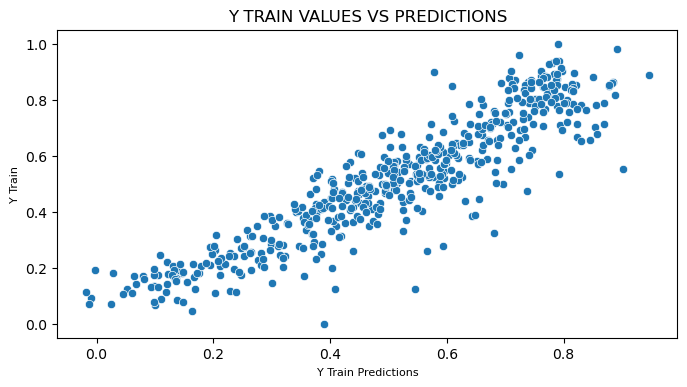

In [72]:
# Create scatter plot of y Train vs. predictions
plt.figure(figsize=(8, 4))
sns.scatterplot(y=y_train, x=y_train_pred, palette='light:#5A9')
plt.title('Y Train Values vs Predictions'.upper(), fontsize=12)
plt.ylabel('Y Train'.title(), fontsize=8)
plt.xlabel('Y Train Predictions'.title(), fontsize=8)
plt.show()

**Observations:**

* The plot depicted above exhibits a consistent variance in predictions, thereby validating the assumption of homoscedasticity.

#### 7.8.3.3 Correlation Testing of Error Terms

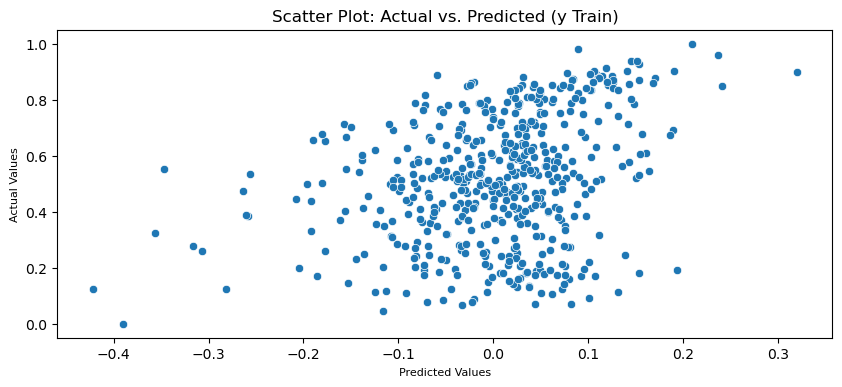

In [74]:
# Calculate residuals
residuals = y_train - y_train_pred

# Create scatter plot
plt.figure(figsize=(10, 4))
sns.scatterplot(x=residuals, y=y_train, palette='light:#5A9')

# Set plot labels
plt.title('Scatter Plot: Actual vs. Predicted (y_Train)', fontsize=12)
plt.xlabel('Predicted Values', fontsize=8)
plt.ylabel('Actual Values', fontsize=8)

plt.show()

## 8. Making Prediction

### 8.1 Applying Scaling on Test Dataset

Our MinMaxScaler instance has already been initialized. We will utilize the same scaler to rescale our test data variables. The scaled feature names are stored in the variable scaler_list, which was obtained during the rescaling process for the training set. We will apply the same scaling to the test data.

In [75]:
# Exploring test data before scaling:
br_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain and Light Snow,Misty and Cloudy
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


In [76]:
# Scaling the variables:
br_test[scaler_list]=scaler.transform(br_test[scaler_list])
br_test.head()

Partitioning the data into X_test and y_test

In [78]:
y_test=br_test.pop('cnt')
X_test=br_test

In [79]:
# Exploring X_test
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Rain and Light Snow,Misty and Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [80]:
# Exploring the test set shape:
X_test.shape

(219, 29)

In [81]:
y_test.shape

(219,)

### 8.2 Making Actual Prediction

In [82]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new=X_test[X_train_6.columns]

In [83]:
#Making predictions
y_test_pred = lm.predict(X_test_new)

### 8.3 Evaluating the Prediction

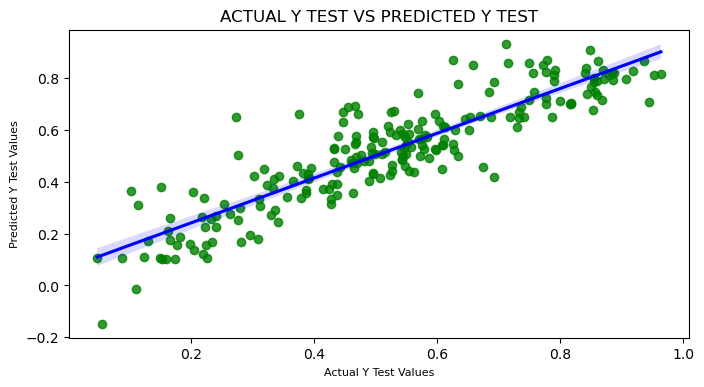

In [84]:
#Plotting y_test and y_pred to understand the spread.
fig=plt.figure(figsize=(8,4))

#Plotting figure
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'color':'green'}, line_kws={'color':'blue'})

#Setting title, ylabel and xlabel
plt.title('actual y test vs predicted y test'.upper(), fontsize=12)
plt.ylabel('predicted y test values'.title(), fontsize=8)
plt.xlabel('actual y test values'.title(), fontsize=8)

plt.show()

**Observation:**

* The scatter plot comparing Y Test values and Y Test predicted values exhibits a strong visual resemblance. This alignment indicates that our predictions are reasonably accurate.
* While there are outliers present, the majority of data points follow the expected trend. Overall, the model demonstrates a healthy fit to the data.

### 8.4 Assessing Model Quality

In [85]:
# R2 score of test data predictions:
round(r2_score(y_pred=y_test_pred, y_true=y_test), 5)

0.79324

In [86]:
# R2 score of train data predictions:
round(r2_score(y_pred=y_train_pred, y_true=y_train), 5)

0.8301

In [87]:
#Absolute difference between R2 scores of test and train dataset predictions
abs(round(r2_score(y_pred=y_test_pred, y_true=y_test), 5) - round(r2_score(y_pred=y_train_pred, y_true=y_train), 5))

0.036860000000000004

As the R2 score shows a difference of less than 5% between predictions on the training data and the test data, we can confidently conclude that the model is reliable and can be effectively generalized.

### 8.5 Equation for prediction

In [95]:
#Initiating const variable for constant referring X_train_6 OLS model above
const=0.0744

#Parameters Series:
parameters=pd.Series(lm.params)
parameters

yr                           0.238668
workingday                   0.076874
temp                         0.600201
windspeed                   -0.099198
Summer                       0.091273
Winter                       0.146575
Sep                          0.096816
Sat                          0.088010
Light Rain and Light Snow   -0.289400
Misty and Cloudy            -0.073713
dtype: float64

In [89]:
# Equation:
print(f'Demand = {round(const,3)}')
for i in range(len(parameters)):
    if i != len(parameters)-1:
        print(f'\t{parameters.index[i]} x {round(parameters.values[i], 3)} + ')
    else:
        print(f'\t{parameters.index[i]} x {round(parameters.values[i], 3)} ')

Demand = 0.074
	yr x 0.239 + 
	workingday x 0.077 + 
	temp x 0.6 + 
	windspeed x -0.099 + 
	Summer x 0.091 + 
	Winter x 0.147 + 
	Sep x 0.097 + 
	Sat x 0.088 + 
	Light Rain and Light Snow x -0.289 + 
	Misty and Cloudy x -0.074 


**Demand**= 0.074 + (**Year**x 0.239) + (**Working Day** x 0.077) + (**Temperature** x 0.6) - (**Windspeed** x 0.099) + (**Summer** x 0.091) + (**Winter** x 0.147) + (**September** x 0.097) + (**Saturday** x 0.088) - (**Light Rain and Light Snow** x 0.289) - (**Misty and Cloudy** x 0.074)

**Notes:**

1. `Positive Coefficients`:
    * Year
    * Working Day
    * Temperature
    * Summer
    * Winter
    * September
    * Saturday
2. `Negative Coefficients`:
    * Windspeed
    * Light Rain
    * Light Snow
    * Misty and Cloudy
3. The **constant** value is **0.074**. In other words, if all variables are set to zero, the predicted demand will be **0.074** unit

## 9. Model Explanation

1. `Baseline Demand`:
    * When all variables are set to zero, the predicted demand is **0.074** units.
2. `Impact of Variables`:
    * Assuming all other features remain unchanged:
        *  For every change in **year**, the demand is expected to increase by **0.239** units.
        * On **working days**, the demand increases by **0.077** units.
        * With each degree rise in **temperature**, the demand increases by **0.06** units.
        * During **summer months**, the demand rises by **0.091** units.
        * In **winter months**, the demand increases by **0.147** units.
        * Specifically in **September**, the demand goes up by **0.097** units.
        * On **Saturdays**, the demand rises by **0.088** units.
        * As **windspeed** increases, the demand decreases by **0.099** units.
        * In **Light Rain and Light Snow** weather conditions, the demand drops by **0.289** units.
        * In **Misty and Cloudy** weather, the demand increases by **0.074** units.

In [90]:
# Defining a function to find top 'n' features
def Top_n_ImportantFeatures(series, n):
    series = series.sort_values(key= lambda x: abs(x), ascending=False)
    return series.head(n)

In [91]:
# Identifying all features in decreasing order of importance
Importance_descend=Top_n_ImportantFeatures(parameters, len(parameters))
Importance_descend

temp                         0.600201
Light Rain and Light Snow   -0.289400
yr                           0.238668
Winter                       0.146575
windspeed                   -0.099198
Sep                          0.096816
Summer                       0.091273
Sat                          0.088010
workingday                   0.076874
Misty and Cloudy            -0.073713
dtype: float64

## 10. Business Recommendations

The given equation is too complex for practical business decision-making. Therefore, we will focus on the top 5 predictors to generate essential and actionable business recommendations.

In [93]:
# Identify Top 5 predictors
top_5_features=Top_n_ImportantFeatures(parameters,5)
top_5_features

temp                         0.600201
Light Rain and Light Snow   -0.289400
yr                           0.238668
Winter                       0.146575
windspeed                   -0.099198
dtype: float64

## 11. **Final Business Recommendations**

Following logical conclusion can be derived from above equation if all external and internal variables are stable:

1. **`Temperature Impact`**:
    * The most critical factor influencing demand is **temperature**. With a coefficient of **0.600201**, for every 1-degree change in temperature, demand increases by a factor of **0.600201** (temperature × 0.600201). Impact is mostly during hotter months (especially in June, July, and August)
2. **`Weather Conditions`**:
    * The second most important factor is **Light Rain or Light Snow**, with a coefficient of **-0.289400**. On days with light rain, demand is expected to decrease by **28.9%**.
3. **`Annual Growth`**:
    * The third significant factor is the **year**, with a coefficient value of **0.238668**.
4. **`Winter Demand`**:
    * The fourth most important factor is **Winter**, with a coefficient of **0.146575**. This implies that demand is expected to increase by a factor of **0.146575** during the winter months (specifically September, October, November, and December).
5. **`Windspeed Impact`**:
    * The fifth most important variable is **windspeed**, with a coefficient of **-0.099198**. For every change in windspeed, demand is predicted to decrease by approximately **10%**.